# Statistic

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
house_data = pd.DataFrame({
    'price': [ 10, 20, 335, 340, 345, 350, 350, 400, 450]
})

print(house_data.describe())

            price
count    9.000000
mean   288.888889
std    159.584965
min     10.000000
25%    335.000000
50%    345.000000
75%    350.000000
max    450.000000


# Central Tendency - Mean, Median, Mode

288.8888888888889


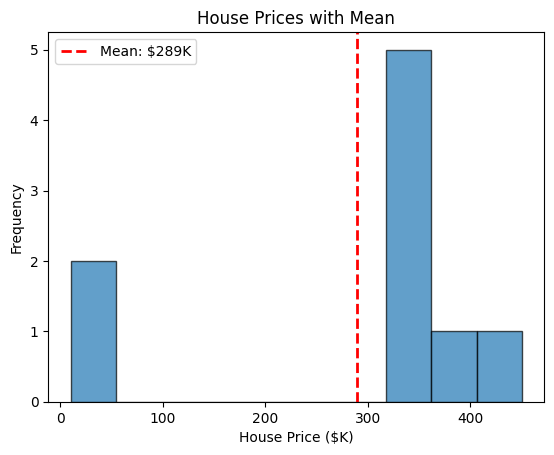

In [53]:
house_mean = house_data['price'].mean()

print(house_mean)

plt.hist(house_data['price'], bins=10, alpha=0.7, edgecolor='black')
plt.axvline(house_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: ${house_mean:.0f}K')
plt.xlabel('House Price ($K)')
plt.ylabel('Frequency')
plt.title('House Prices with Mean')
plt.legend()

# plt.tight_layout()
plt.show()

In [54]:
house_median = house_data['price'].median()

print(house_median)

345.0


In [55]:
house_mode = house_data['price']. mode()

print(house_mode)

0    350
Name: price, dtype: int64


# Variance and Standard Deviation


In [56]:
house_data = pd.DataFrame({
    'price': [ 335, 340, 345, 350, 350, 400, 450]
})

print("Variance: ", np.var(house_data['price']))
print("STD: ", np.std(house_data['price']))
print("Mean : ", house_data['price'].mean())
print(house_data)

Variance:  1541.8367346938776
STD:  39.266228933956434
Mean :  367.14285714285717
   price
0    335
1    340
2    345
3    350
4    350
5    400
6    450


# Percentiles and Quartiles


In [57]:
perc = np.percentile(house_data['price'],35)
print(perc)

345.5


In [58]:
Q0 = np.percentile(house_data['price'],0)
Q1 = np.percentile(house_data['price'],25)
Q2 = np.percentile(house_data['price'],50)
Q3 = np.percentile(house_data['price'],75)
Q4 = np.percentile(house_data['price'],100)

print(Q0, Q1, Q2, Q3, Q4)

335.0 342.5 350.0 375.0 450.0


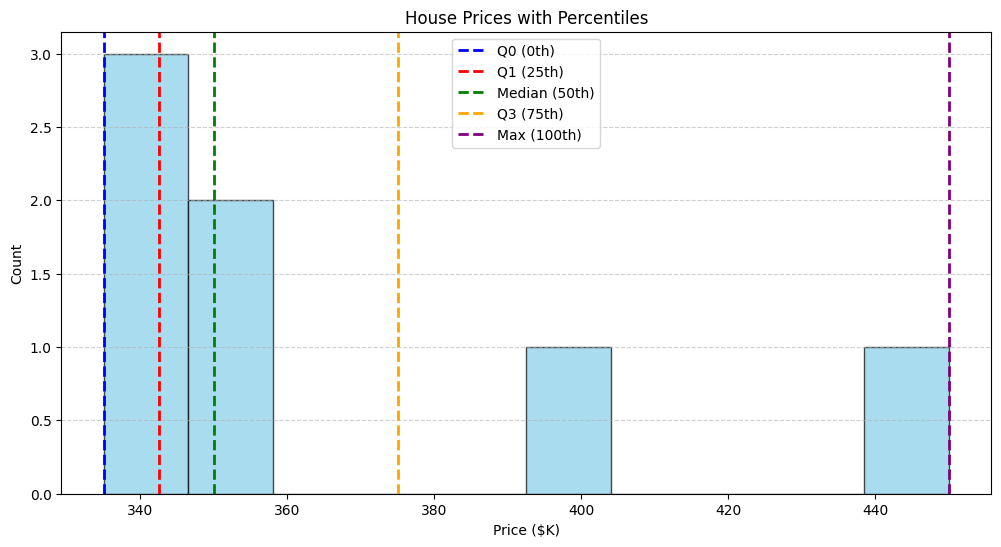

In [59]:
plt.figure(figsize=(12,6))

plt.hist(house_data['price'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(Q0, color='blue', linestyle='--', linewidth=2, label='Q0 (0th)')
plt.axvline(Q1, color='red', linestyle='--', linewidth=2, label='Q1 (25th)')
plt.axvline(Q2, color='green', linestyle='--', linewidth=2, label='Median (50th)')
plt.axvline(Q3, color='orange', linestyle='--', linewidth=2, label='Q3 (75th)')
plt.axvline(Q4, color='purple', linestyle='--', linewidth=2, label='Max (100th)')

plt.title('House Prices with Percentiles')
plt.xlabel('Price ($K)')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Measures of Spread - Range, IQR, Z-Score


In [60]:
print(house_data)
# max - min
print(house_data['price'].max() - house_data['price'].min())

   price
0    335
1    340
2    345
3    350
4    350
5    400
6    450
115


In [61]:
# IQR = Q3( 75%) - Q1 (25 %)
IQR = Q3 - Q1
print(Q3, Q1)
print(IQR)

375.0 342.5
32.5


In [62]:

#  Outlier detect করার standard rule (Tukey’s method):
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print(lower, upper)

293.75 423.75


In [63]:
house_data = pd.DataFrame({
    'price': [10, 20 , 335, 340, 345, 350, 350, 400, 450, 1200]
})

Q0 = np.percentile(house_data['price'],0)
Q1 = np.percentile(house_data['price'],25)
Q2 = np.percentile(house_data['price'],50)
Q3 = np.percentile(house_data['price'],75)
Q4 = np.percentile(house_data['price'],100)


IQR = Q3 - Q1

# standard rule (Tukey’s method)
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print(lower, upper)

259.375 464.375


In [64]:
upper = Q3 + 2.5 * IQR
lower = Q1 - 2.5 * IQR

print(lower, upper)

208.125 515.625


z = (x - μ) / σ

x = যে ডেটা পয়েন্টের Z-স্কোর বের করবো

μ (mu) = পুরো ডেটাসেটের গড় (Mean)

σ (sigma) = পুরো ডেটাসেটের স্ট্যান্ডার্ড ডিভিয়েশন


Outlier detect (Z-score threshold)

সাধারণত: -3 < z < +3 → normal

z > 3 or z < -3 → extreme / outlier

In [65]:
# Z-score
mean_price = house_data['price'].mean()
std_price = house_data['price'].std(ddof=0)
print(mean_price, std_price)
house_data['z-score'] = (house_data['price']- mean_price)/std_price
house_data.head(10)

380.0 308.3585575267857


,price,z-score
0,10,-1.199902
1,20,-1.167472
2,335,-0.145934
3,340,-0.129719
4,345,-0.113504
5,350,-0.097289
6,350,-0.097289
7,400,0.064860
8,450,0.227008
9,1200,2.659242


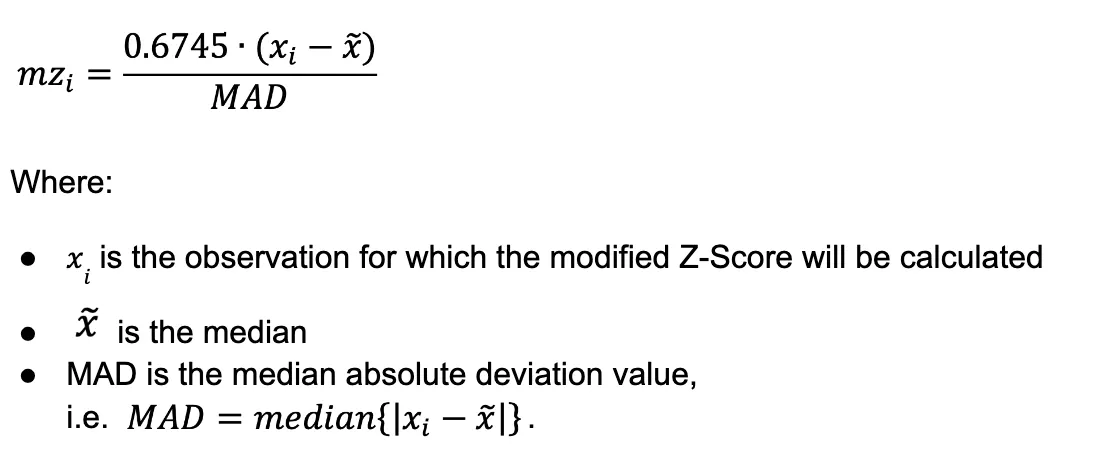

Interpretation

Usually, |Modified Z| > 3.5 → suspected outlier

In [69]:
def modif_z_score(x):
   # median
   print(x)

   x_mid = x.median()
   print("x_mid=", x_mid)

   mad = abs(x - x_mid)
   mad = mad.median()

   mz = 0.6745 * (x - x_mid) / mad


   return mz
house_data['modified_z_score'] = modif_z_score(house_data['price'])
print(house_data)

0      10
1      20
2     335
3     340
4     345
5     350
6     350
7     400
8     450
9    1200
Name: price, dtype: int64
x_mid= 347.5
   price   z-score  modified_z_score
0     10 -1.199902         -7.004423
1     20 -1.167472         -6.796885
2    335 -0.145934         -0.259423
3    340 -0.129719         -0.155654
4    345 -0.113504         -0.051885
5    350 -0.097289          0.051885
6    350 -0.097289          0.051885
7    400  0.064860          1.089577
8    450  0.227008          2.127269
9   1200  2.659242         17.692654


# Distribution Shapes - Skewness & Visualization

House  -0.36774622946790675
Math  -2.864676715870261


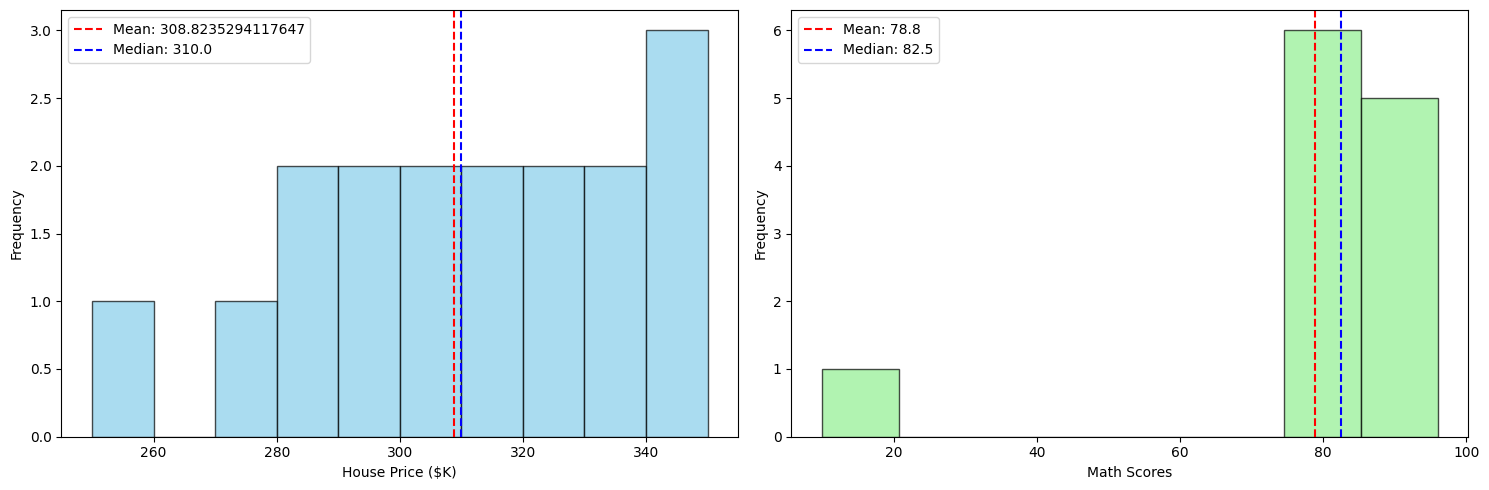

In [80]:
house_data = pd.DataFrame({
    'price': [250, 275, 280, 285, 290, 295, 300, 305, 310, 315,
              320, 325, 330, 335, 340, 345, 350]
})

student_data = pd.DataFrame({
    'math_scores': [10, 90, 96, 75, 80, 92, 88, 95, 76, 81, 79, 84],
})


house_skew = house_data['price'].skew()
math_skew = student_data['math_scores'].skew()

print("House " ,house_skew)
print("Math ", math_skew)

house_mean = house_data['price'].mean()
house_median = house_data['price'].median()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(house_data['price'], bins=10, alpha=0.7, edgecolor='black', color='skyblue')
plt.axvline(house_mean, color='red', linestyle='--', label=f'Mean: {house_mean}')
plt.axvline(house_median, color='blue', linestyle='--', label=f'Median: {house_median}')
plt.xlabel('House Price ($K)')
plt.ylabel('Frequency')
plt.legend()

math_mean = student_data['math_scores'].mean()
math_median = student_data['math_scores'].median()

plt.subplot(1, 2, 2)
plt.hist(student_data['math_scores'], bins=8, alpha=0.7, edgecolor='black', color='lightgreen')
plt.axvline(math_mean, color='red', linestyle='--', label=f'Mean: {math_mean:.1f}')
plt.axvline(math_median, color='blue', linestyle='--', label=f'Median: {math_median}')
plt.xlabel('Math Scores')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


Skewness হলো ডেটার asymmetry, অর্থাৎ distribution ডান বা বাম দিকে টানা।

Value = 0 → perfect symmetric

Positive → right-skewed

Negative → left-skewed

Machine learning / EDA:

|skew| < 0.5 → normally considered “acceptable”

0.5 < |skew| < 1 → moderate skew, may consider transformation

|skew| > 1 → highly skewed, consider log/sqrt transformation